In [16]:
import pyautogui
import cv2
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader

import copy
import os
from IPython import display

from torchvision import transforms

import pandas as pd
from torchvision.io import read_image
from PIL import Image
import time

In [21]:
path_weight = './resnet18.pth'
path_testfol = './donotdelete'
path_save = path_testfol + '/test/screenshot.png'

In [22]:
output = {
    0 : 'Boat',
    1 : 'Bulk cargo',
    2 : 'Container',
    3 : 'Cruiser',
    4 : 'Oil tank',
    5 : 'Submarine',
    6 : 'Yacht'
}

In [23]:
def test_cz (image):    
    from torchvision import transforms
    
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = ""
    device = torch.device('cpu')

    model = models.resnet18(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 7) 

    model.load_state_dict(torch.load(path_weight,map_location=torch.device('cpu')))
    batch_size =1
    transforms = transforms.Compose(
    [
        transforms.ToTensor()
    ])
    
    test_dataset = datasets.ImageFolder(root=path_testfol,transform = transforms)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)    
    
    with torch.no_grad():
        model.eval()
        for data_t,target_t in test_dataloader:
            outputs_t = model(data_t) 
            pred_out,pred_t = torch.max(outputs_t, dim=1)
            
    return pred_t.item()

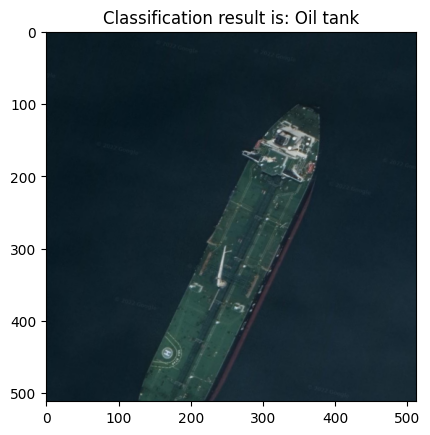

KeyboardInterrupt: 

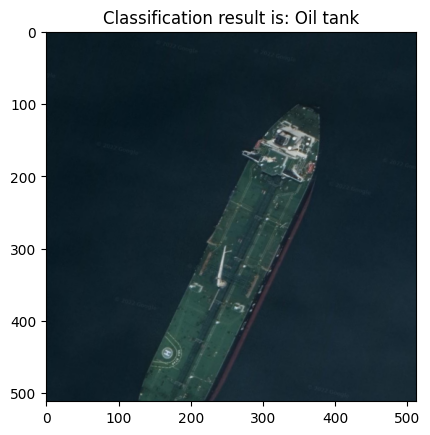

In [24]:
for i in range(9999):
    image = pyautogui.screenshot(region=(150,150, 512, 512))
    image.save(path_save)
    plt.imshow(image)
    image = np.array(image) 
    result = test_cz(image)
    title = 'Classification result is: ' + str(output[result])
    plt.title(title)
    display.clear_output(wait=True)
    display.display(plt.gcf())